In [5]:
from src.task_4.task_4_comissions import *
from src.utils import *
import matplotlib.pyplot as plt

load_data_to_postgres(utils.HOST, None)
run_dbt()
df = fetch_dbt_results(utils.HOST, view_name=VIEW_NAME)

Orders.csv data loaded successfully!
Invoicing_data.json data loaded successfully!
DBT command executed successfully.
01:43:39  Running with dbt=1.8.9
01:43:39  Registered adapter: postgres=1.8.2
01:43:39  Found 1 model, 428 macros
01:43:39  
01:43:40  Concurrency: 1 threads (target='dev')
01:43:40  
01:43:40  1 of 1 START sql view model public.calculate_comissions ........................ [RUN]
01:43:40  1 of 1 OK created sql view model public.calculate_comissions ................... [CREATE VIEW in 0.11s]
01:43:40  
01:43:40  Finished running 1 view model in 0 hours 0 minutes and 0.33 seconds (0.33s).
01:43:40  
01:43:40  Completed successfully
01:43:40  
01:43:40  Done. PASS=1 WARN=0 ERROR=0 SKIP=0 TOTAL=1



In [6]:
df.head()

,salesowner,total_commission
0,Leonard Cohen,650.31
1,David Henderson,487.77
2,Luke Skywalker,377.61
3,Yuri Gagarin,309.23
4,David Goliat,279.38


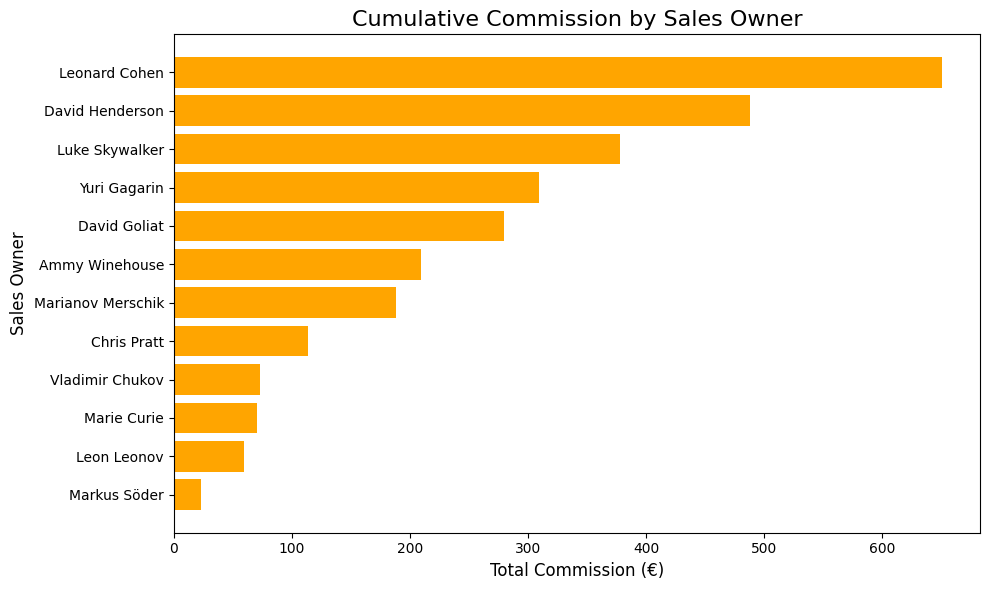

In [10]:
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values(by="total_commission", ascending=True)
plt.barh(df_sorted["salesowner"], df_sorted["total_commission"], color='orange')
plt.title("Cumulative Commission by Sales Owner", fontsize=16)
plt.xlabel("Total Commission (€)", fontsize=12)
plt.ylabel("Sales Owner", fontsize=12)
plt.tight_layout()
plt.show()

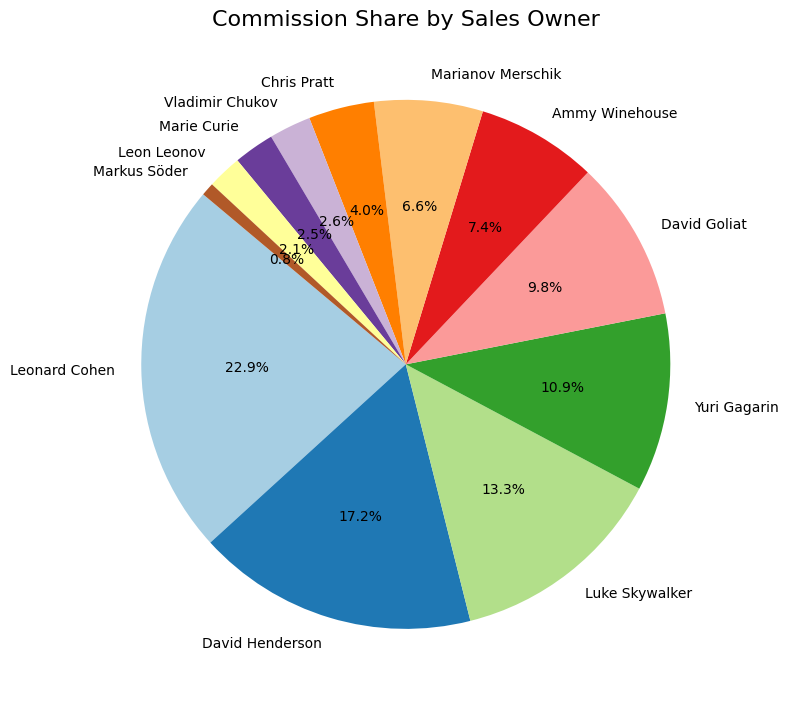

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(
    df["total_commission"],
    labels=df["salesowner"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Commission Share by Sales Owner", fontsize=16)
plt.tight_layout()
plt.show()